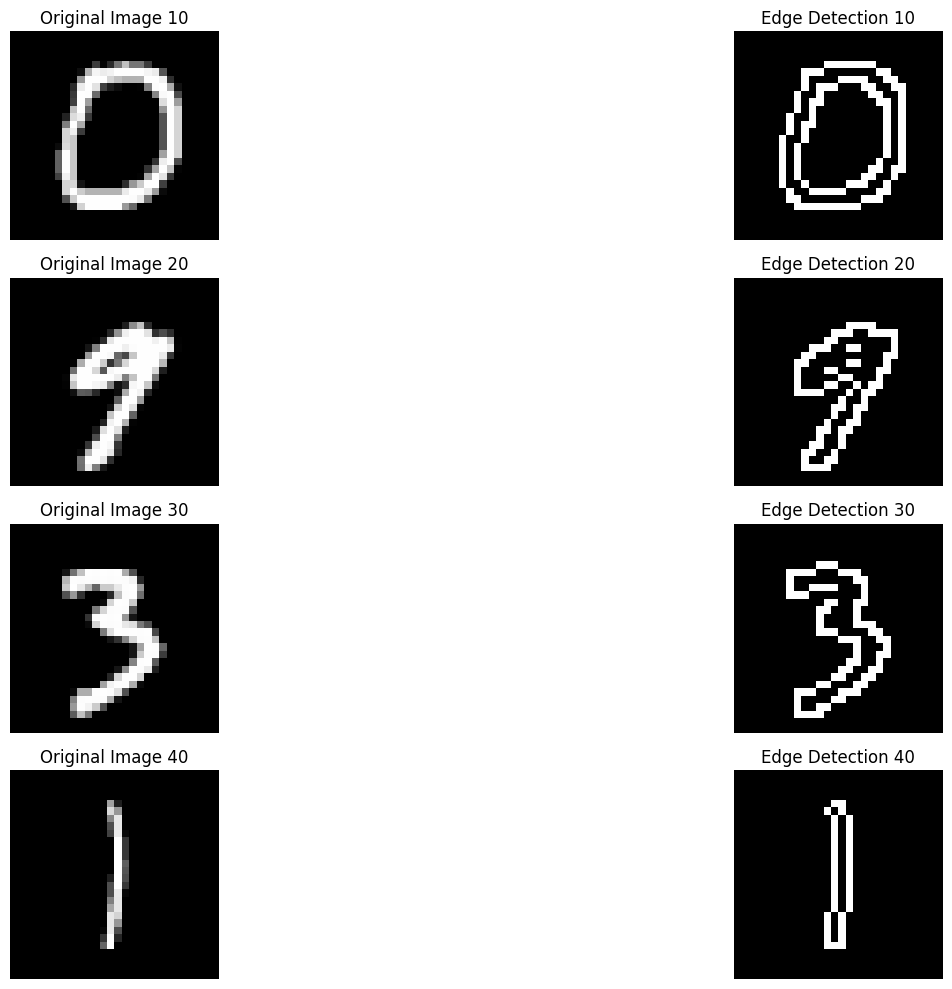

In [5]:
import matplotlib.pyplot as plt

# Assuming apply_edge_detection is defined and x_test is available

def apply_edge_detection(image):
    # Placeholder function for edge detection
    # Replace with actual edge detection logic, e.g., using Canny edge detector from OpenCV
    import cv2
    edges = cv2.Canny(image, 100, 200)
    return edges

# Sample indices to visualize
sample_indices = [10, 20, 30, 40]

plt.figure(figsize=(20, 10))

for i, sample_index in enumerate(sample_indices):
    sample_image = x_test[sample_index]
    edges = apply_edge_detection(sample_image)

    # Original image
    plt.subplot(4, 2, 2*i + 1)
    plt.title(f"Original Image {sample_index}")
    plt.imshow(sample_image, cmap='gray')
    plt.axis('off')
    
    # Edge detection
    plt.subplot(4, 2, 2*i + 2)
    plt.title(f"Edge Detection {sample_index}")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import os
import cv2

# Key Generation
p = 467  # large prime number
r = 2    # primitive root of p
a = 253  # Private key
s = r**a % p  # Public key component

# Directories
input_data_path = '/kaggle/input/augmented-kaggle-mnsit-dataset/aug_data_obj.npy'
input_labels_path = '/kaggle/input/augmented-kaggle-mnsit-dataset/aug_labels_obj.npy'
output_directory = '/kaggle/working/encrypted_dataset'

def encrypt_image(img, r, s, p):
    rows, cols = img.shape[:2]
    encrypted_img = np.zeros_like(img, dtype=np.uint8)
    X = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            k = np.random.randint(1, p-1)  # Some random integer k
            X[i, j] = r**k % p
            encrypted_img[i, j] = (img[i, j] * (s**k % p)) % p

    return encrypted_img, X

def process_data(input_data_path, output_dir, r, s, p):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    data = np.load(input_data_path)

    for idx, img in enumerate(data):
        encrypted_img, X = encrypt_image(img, r, s, p)
        
        encrypted_img_path = os.path.join(output_dir, f'image_{idx}_encrypted.npy')
        X_path = os.path.join(output_dir, f'image_{idx}_X.npy')
        
        np.save(encrypted_img_path, encrypted_img)
        np.save(X_path, X)

        print(f'Encrypted and saved: {encrypted_img_path}')

# Process the dataset and save the encrypted images
process_data(input_data_path, output_directory, r, s, p)


ValueError: cannot reshape array of size 286329088 into shape (784,1050000)

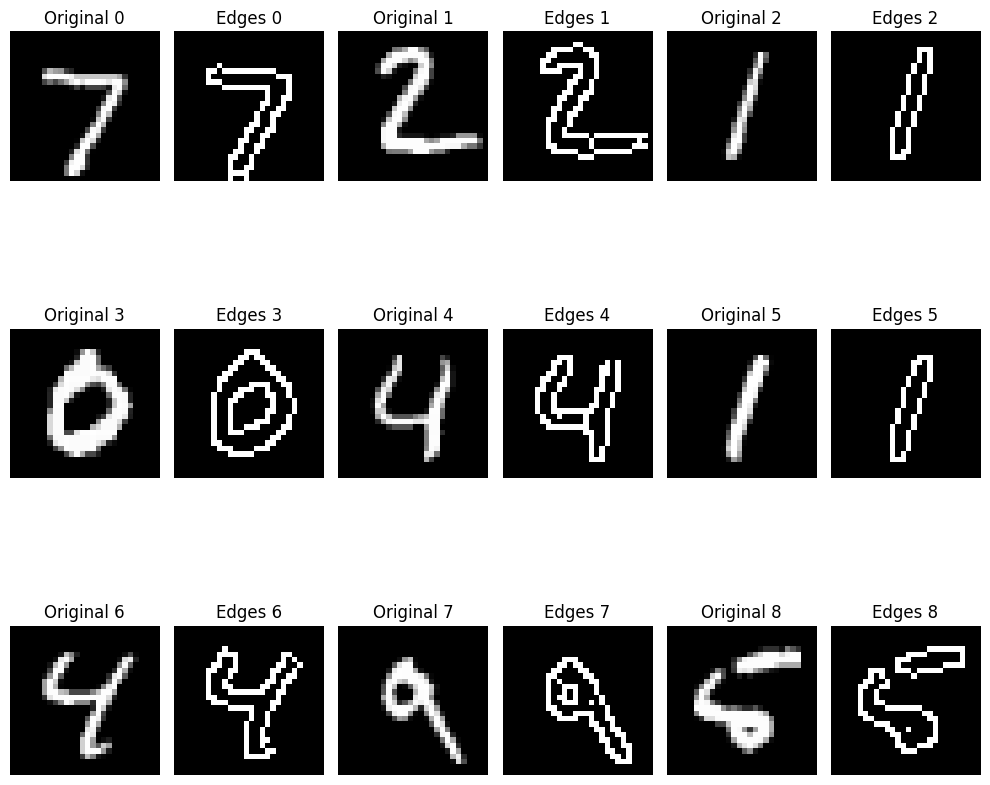

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def apply_edge_detection(image):
    image = image.astype(np.uint8)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)
    return edges

sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8] 
plt.figure(figsize=(10, 10))

for i, index in enumerate(sample_indices):
    sample_image = x_test[index]
    edges = apply_edge_detection(sample_image)
    
    plt.subplot(3, 6, 2*i + 1)
    plt.title(f"Original {index}")
    plt.imshow(sample_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 6, 2*i + 2)
    plt.title(f"Edges {index}")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


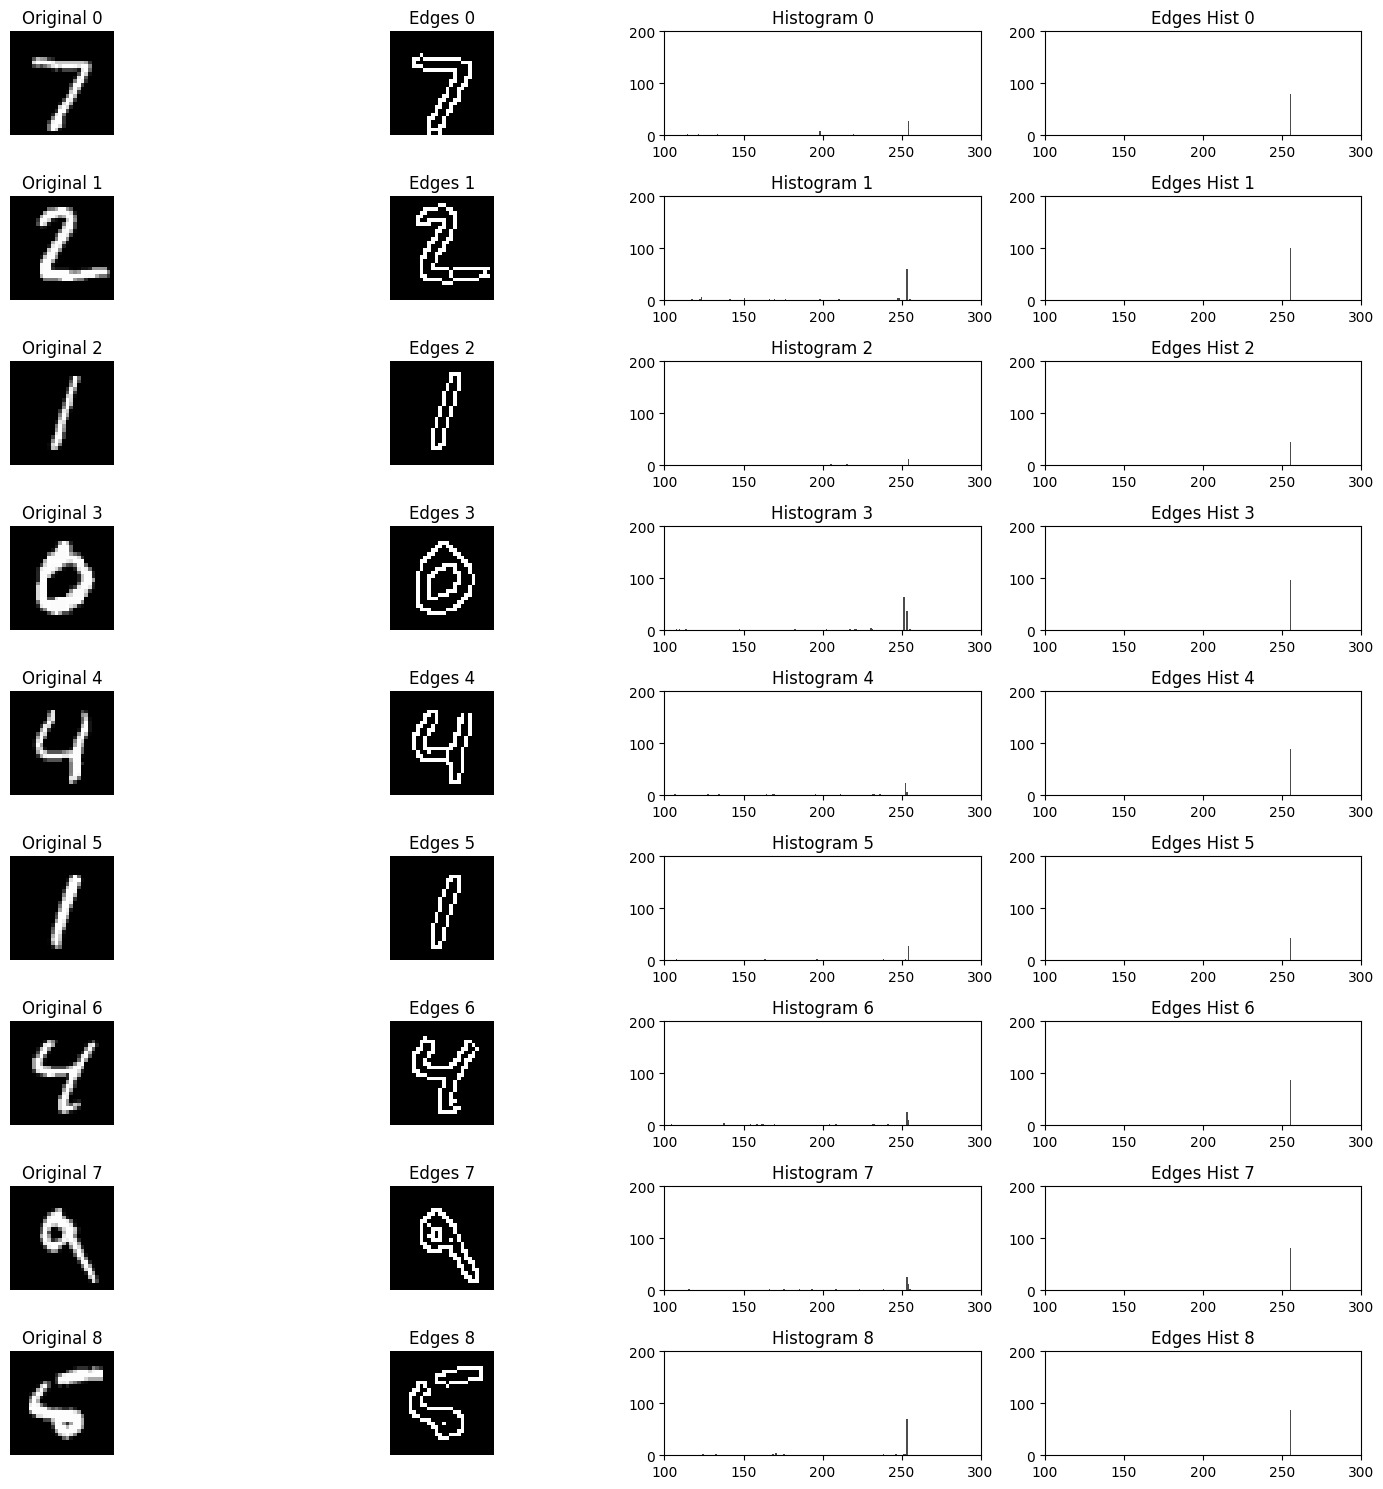

In [16]:
sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8] 

plt.figure(figsize=(15, 15))

for i, index in enumerate(sample_indices):
    sample_image = x_test[index]
    edges = apply_edge_detection(sample_image)
    
   
    plt.subplot(9, 4, 4*i + 1)
    plt.title(f"Original {index}")
    plt.imshow(sample_image, cmap='gray')
    plt.axis('off')
    
   
    plt.subplot(9, 4, 4*i + 2)
    plt.title(f"Edges {index}")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

   
    plt.subplot(9, 4, 4*i + 3)
    plt.title(f"Histogram {index}")
    plt.hist(sample_image.ravel(), bins=256, range=[0,256], color='black', alpha=0.7)
    plt.xlim([100, 300])
    plt.ylim([0, 200])
    
    
    plt.subplot(9, 4, 4*i + 4)
    plt.title(f"Edges Hist {index}")
    plt.hist(edges.ravel(), bins=256, range=[0,256], color='black', alpha=0.7)
    plt.xlim([100, 300])
    plt.ylim([0, 200])

plt.tight_layout()
plt.show()


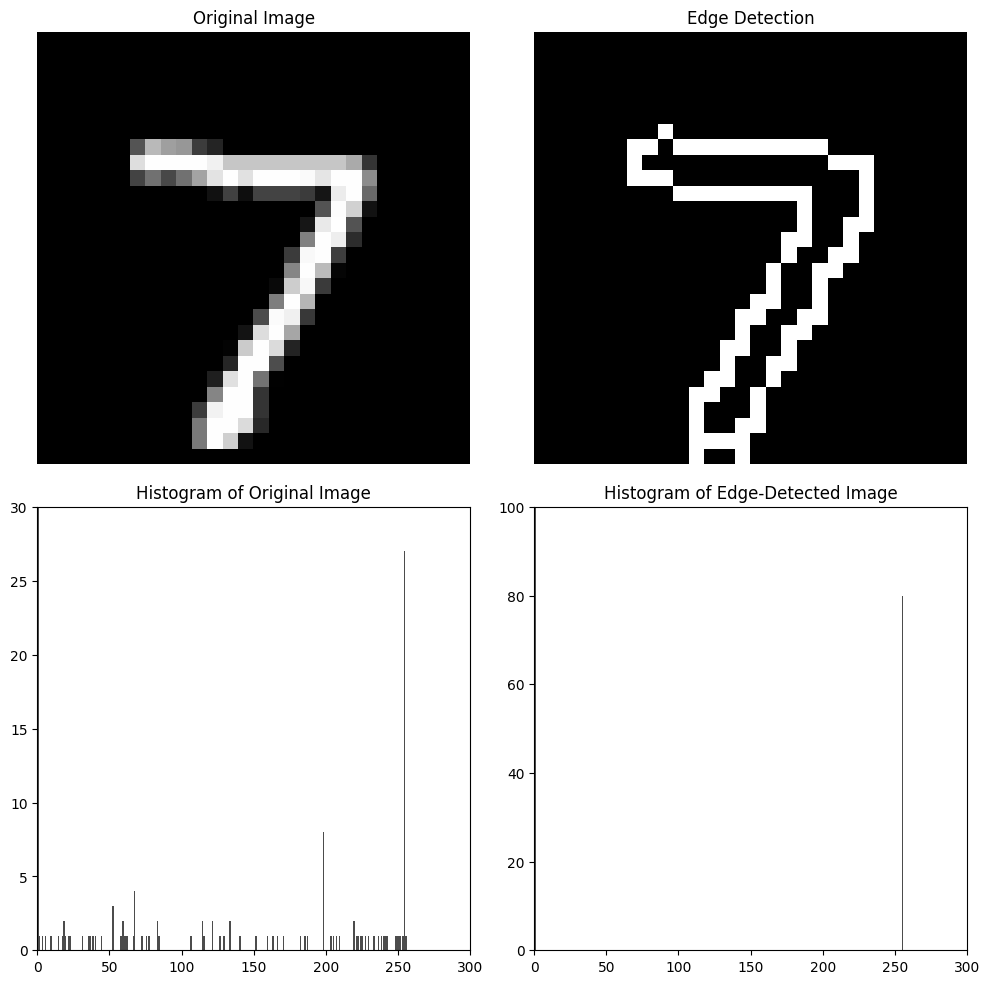

In [21]:
sample_index = 0  
sample_image = x_test[sample_index]


edges = apply_edge_detection(sample_image)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image, cmap='gray')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 2)
plt.title("Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')

# Histogram of original image
plt.subplot(2, 2, 3)
plt.title("Histogram of Original Image")
plt.hist(sample_image.ravel(), bins=256, range=[0,256], color='black', alpha=0.7)
plt.xlim([0, 300])
plt.ylim([0, 30])

# Histogram of edge-detected image
plt.subplot(2, 2, 4)
plt.title("Histogram of Edge-Detected Image")
plt.hist(edges.ravel(), bins=256, range=[0,256], color='black', alpha=0.7)
plt.xlim([0, 300])
plt.ylim([0, 100])

plt.tight_layout()
plt.show()

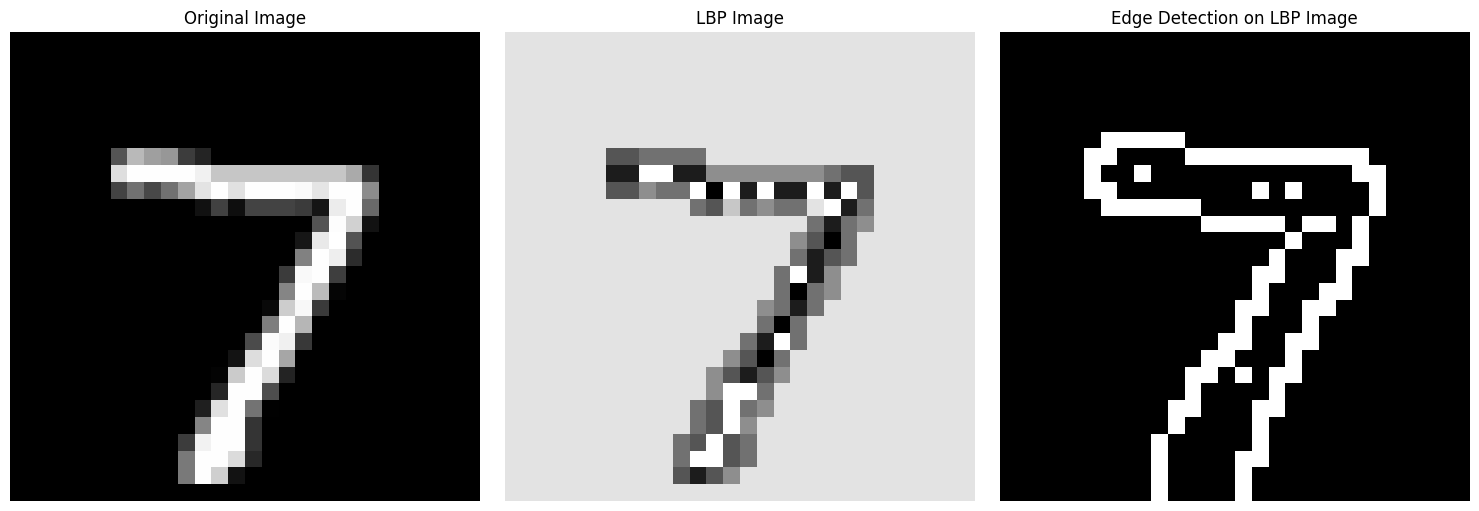

In [24]:
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from skimage import exposure
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()


def apply_lbp(image, radius=1, n_points=8):
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return lbp


def apply_edge_detection(image):
    image = image.astype(np.uint8)
    image = cv2.equalizeHist(image)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(blurred, threshold1=10, threshold2=50)
    return edges

sample_index = 0  
sample_image = x_test[sample_index]

lbp_image = apply_lbp(sample_image)


edges_lbp_image = apply_edge_detection(lbp_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(sample_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("LBP Image")
plt.imshow(lbp_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Edge Detection on LBP Image")
plt.imshow(edges_lbp_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


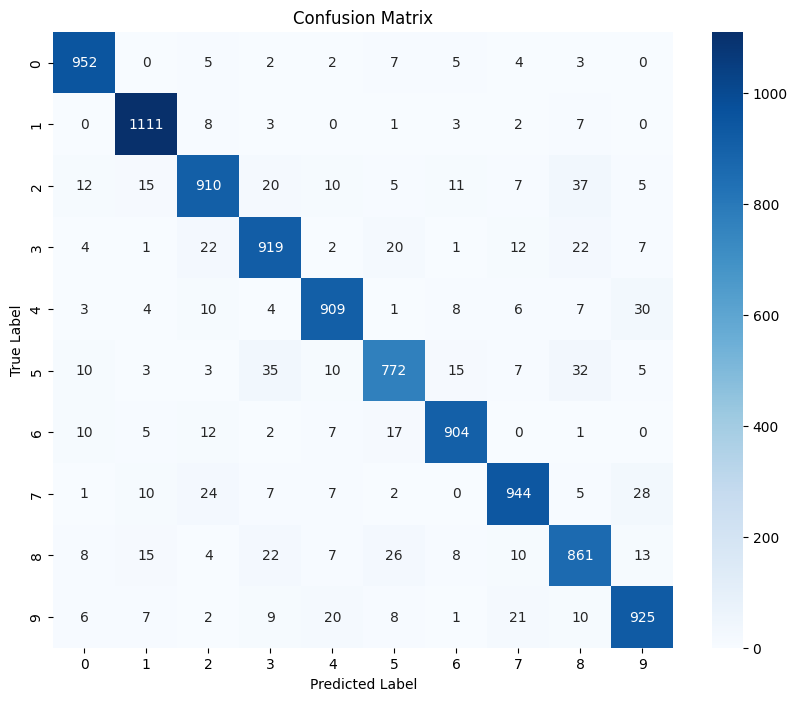

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.datasets import mnist
import seaborn as sns

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Train a simple classifier
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train_flat, y_train)
y_pred = clf.predict(x_test_flat)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
